In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Access the datasets either by linking Drive account or just simply upload the dataset!
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Load the the dataset:
X_train = np.load('X_train.npy', allow_pickle=True)
X_test = np.load('X_test.npy', allow_pickle=True)
X_val = np.load('X_val.npy', allow_pickle=True)

y_train = np.load('y_train.npy', allow_pickle=True)
y_test = np.load('y_test.npy', allow_pickle=True)
y_val = np.load('y_val.npy', allow_pickle=True)

In [4]:
print(f"Length of X_train: \t {len(X_train)}")
print(f"Length of X_test: \t {len(X_test)}")
print(f"Length of X_val: \t {len(X_val)}")

print(f"Length of y_train: \t {len(y_train)}")
print(f"Length of y_test: \t {len(y_test)}")
print(f"Length of y_val: \t {len(y_val)}")

Length of X_train: 	 6985
Length of X_test: 	 873
Length of X_val: 	 874
Length of y_train: 	 6985
Length of y_test: 	 873
Length of y_val: 	 874


In [5]:
X_test[15]

array([[  9,  12,  18, ...,   1,   0,   1],
       [ 55,  53,  65, ...,  37,  39,  42],
       [ 54,  63,  72, ...,  50,  49,  41],
       ...,
       [151, 144, 148, ..., 122, 125, 115],
       [130, 158, 159, ..., 147, 147, 147],
       [165, 188, 184, ..., 172, 156, 167]], dtype=uint8)

In [6]:
# Divide each dataset by 255
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

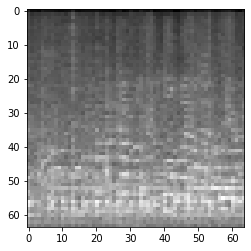

In [7]:
plt.imshow(X_train[135], cmap="gray")

# Construct the Neural Network

In [8]:
# Import required methods from tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# Create the model object
model = Sequential()

## Feature Extraction Layers

For the first two layers, we add a convolution and max pooling layer.

In [10]:
model.add(Conv2D(32,
                 kernel_size = (3,3),     # Convolution layer K.S (3x3)
                 strides=(1,1),           # Scans 1-1
                 padding = "same",        # Same for edges
                 activation = "relu",     # Choose Rectified Linear Unit(relu) | alts: leaky_relu, sigmoid, tanh
                 input_shape=(64,64,1)))  # Same as image shape!

model.add(MaxPooling2D((2,2)))

Add more layers..

In [11]:
model.add(Conv2D(64,
                 kernel_size = (3,3),
                 strides=(1,1),
                 padding = "same",
                 activation = "relu",
                 input_shape=(64,64,1)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 strides=(1,1),
                 padding = "same",
                 activation = "relu",
                 input_shape=(64,64,1)))

Now, in order to connect the 2D convolution and 1D dense layers, we flatten the convolution layer.

In [12]:
model.add(Flatten())

Add two dense layers:

In [13]:
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

In [14]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation = "softmax")) #We have 10 class

In [15]:
# Let's summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 16384)             0

## Optimizer

In [16]:
# Compile the model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy", #Multi class classification
              metrics = ["accuracy"])

## Training the Model

In [17]:
results = model.fit(X_train, y_train,
                    batch_size = 128,   # How many pictures does the NN see at the same time
                    epochs = 50,
                    validation_data = (X_val, y_val))

Epoch 1/50
55/55 [==============================] - 5s 28ms/step - loss: 2.2189 - accuracy: 0.1644 - val_loss: 1.9851 - val_accuracy: 0.3055
Epoch 2/50
55/55 [==============================] - 1s 19ms/step - loss: 1.9629 - accuracy: 0.2696 - val_loss: 1.7294 - val_accuracy: 0.4062
Epoch 3/50
55/55 [==============================] - 1s 19ms/step - loss: 1.7478 - accuracy: 0.3641 - val_loss: 1.4809 - val_accuracy: 0.5080
Epoch 4/50
55/55 [==============================] - 1s 19ms/step - loss: 1.5778 - accuracy: 0.4335 - val_loss: 1.3143 - val_accuracy: 0.5629
Epoch 5/50
55/55 [==============================] - 1s 19ms/step - loss: 1.4526 - accuracy: 0.4859 - val_loss: 1.3661 - val_accuracy: 0.5080
Epoch 6/50
55/55 [==============================] - 1s 19ms/step - loss: 1.3585 - accuracy: 0.5225 - val_loss: 1.1173 - val_accuracy: 0.6487
Epoch 7/50
55/55 [==============================] - 1s 20ms/step - loss: 1.2870 - accuracy: 0.5422 - val_loss: 1.0188 - val_accuracy: 0.6682
Epoch 8/50
55

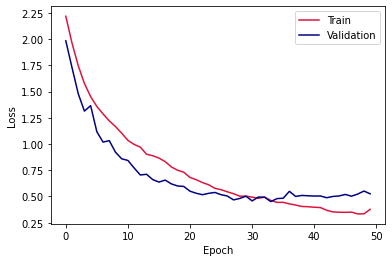

In [18]:
# Plot the the training loss
plt.plot(results.history['loss'], c = 'Crimson', label = 'Train')

# Plot the the validation loss
plt.plot(results.history['val_loss'], c= 'navy', label = 'Validation')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

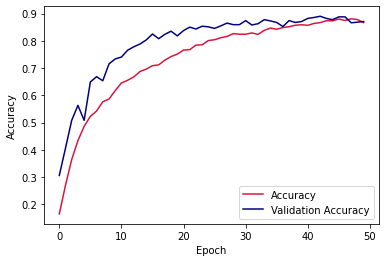

In [19]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], c = 'Crimson', label = 'Accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], c = 'navy', label = 'Validation Accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [20]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.5448 - accuracy: 0.8580


[0.5447598099708557, 0.8579610586166382]

In [21]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[320].reshape(1,64,64,1))

# Print the prediction result
prediction_result

array([[9.5843716e-06, 4.4198672e-10, 1.4231774e-06, 4.2200304e-04,
        9.9946445e-01, 1.5856889e-09, 6.4917671e-08, 8.6807726e-05,
        4.0217074e-08, 1.5641484e-05]], dtype=float32)

In [22]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [23]:
# Print the results
print(f"Image belongs to the class {predicted_class} with {predicted_probability} probability.")

Image belongs to the class 4 with 0.9994644522666931 probability.


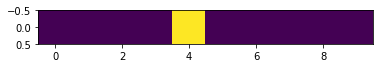

In [24]:
plt.imshow(prediction_result)